<a href="https://colab.research.google.com/github/newbiepawel/Hello-Github/blob/master/rnn_to_correct.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [106]:
from google.colab import files

uploaded = files.upload()

Saving GSPC_train.csv to GSPC_train (3).csv


In [0]:
import io
dataset_train = pd.read_csv(io.BytesIO(uploaded['GSPC_train.csv']))

In [6]:
dataset_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,7/25/2014,1984.599976,1984.599976,1974.369995,1978.339966,1978.339966,2638960000
1,7/28/2014,1978.250000,1981.520020,1967.310059,1978.910034,1978.910034,2803320000
2,7/29/2014,1980.030029,1984.849976,1969.949951,1969.949951,1969.949951,3183300000
3,7/30/2014,1973.209961,1978.900024,1962.420044,1970.069946,1970.069946,3448250000
4,7/31/2014,1965.140015,1965.140015,1930.670044,1930.670044,1930.670044,4193000000


In [0]:
training_set = dataset_train.iloc[:, 1:2].values


In [109]:
training_set.shape

(1278, 1)

In [0]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [0]:
X_train = []
y_train = []
for i in range(60, 1239):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)


In [0]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [113]:
X_train.shape

(1179, 60, 1)

In [114]:
y_train.shape

(1179,)

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [0]:
model = Sequential()

In [0]:
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))

In [0]:
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))


In [0]:
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))


In [0]:
model.add(LSTM(units = 50))
model.add(Dropout(0.2))


In [0]:
model.add(Dense(units = 1))

In [0]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [123]:
model.fit(X_train, y_train, epochs = 100, batch_size = 32)


Epoch 1/100
1179/1179 [==============================] - 17s 15ms/step - loss: 0.0570
Epoch 2/100
1179/1179 [==============================] - 11s 10ms/step - loss: 0.0073
Epoch 3/100
1179/1179 [==============================] - 6s 5ms/step - loss: 0.0056
Epoch 4/100
1179/1179 [==============================] - 6s 5ms/step - loss: 0.0056
Epoch 5/100
1179/1179 [==============================] - 6s 5ms/step - loss: 0.0053
Epoch 6/100
1179/1179 [==============================] - 6s 5ms/step - loss: 0.0050
Epoch 7/100
1179/1179 [==============================] - 6s 5ms/step - loss: 0.0047
Epoch 8/100
1179/1179 [==============================] - 6s 5ms/step - loss: 0.0045
Epoch 9/100
1179/1179 [==============================] - 6s 5ms/step - loss: 0.0053
Epoch 10/100
1179/1179 [==============================] - 6s 5ms/step - loss: 0.0045
Epoch 11/100
1179/1179 [==============================] - 6s 5ms/step - loss: 0.0046
Epoch 12/100
1179/1179 [==============================] - 6s 5ms/step 

In [73]:
from google.colab import files

uploaded = files.upload()

Saving GSPC_test.csv to GSPC_test.csv


In [0]:
import io
dataset_test = pd.read_csv(io.BytesIO(uploaded['GSPC_test.csv']))

In [0]:
real_stock_price = dataset_test.iloc[:, 1:2].values

In [134]:
X_test.shape

(20, 1, 60)

In [0]:
X_test = X_test.reshape(60, 1, 20)

In [0]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)

In [0]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

In [139]:
inputs.shape

(80,)

In [0]:
inputs = inputs.reshape(-1,1)

In [141]:
inputs.shape

(80, 1)

In [0]:
inputs = sc.transform(inputs)

In [0]:
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])

In [0]:
X_test = np.array(X_test)

In [175]:
X_test.shape

(20, 60)

In [0]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [177]:
X_test.shape

(20, 60, 1)

In [0]:
X_test = X_test.reshape(1, -1)

In [0]:
predicted_stock_price = model.predict(X_test)

In [187]:
model.predict(X_test)

array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan]], dtype=float32)

In [183]:
predicted_stock_price

array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan]], dtype=float32)

In [0]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [185]:
predicted_stock_price

array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan]], dtype=float32)

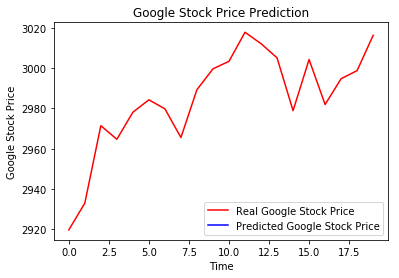

In [182]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()